In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression , LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'raw.githubusercontent.com_dsrscientist_DSData_master_happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.isnull().sum()
#null checked no null value 

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
df.shape
#158 rows and 12 columns

(158, 12)

In [5]:
df.info()
#there is object datatype and integer value both are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.describe()
#no null vlaue 
#there will be skewneess in data set 


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
list_Ten_Happiest = df.sort_values(by = 'Happiness Rank')

list_Ten_Happiest.head(10)
#top 10 country according to rank 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
df.sort_values(by="Happiness Rank", ascending=True).head(10)
#top 10 happiness country by rank wise and most of country are from western europe

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
df.sort_values(by="Happiness Rank", ascending=False).head(10)
#botton 10  happiness country by rank wise
#All bottom countries which is leat happiness is from sub-saharan africa 

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [10]:
df1 = df[df.columns[3:]]
df1
#just initliaze data for checking the distplot just exclude dataobject 

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


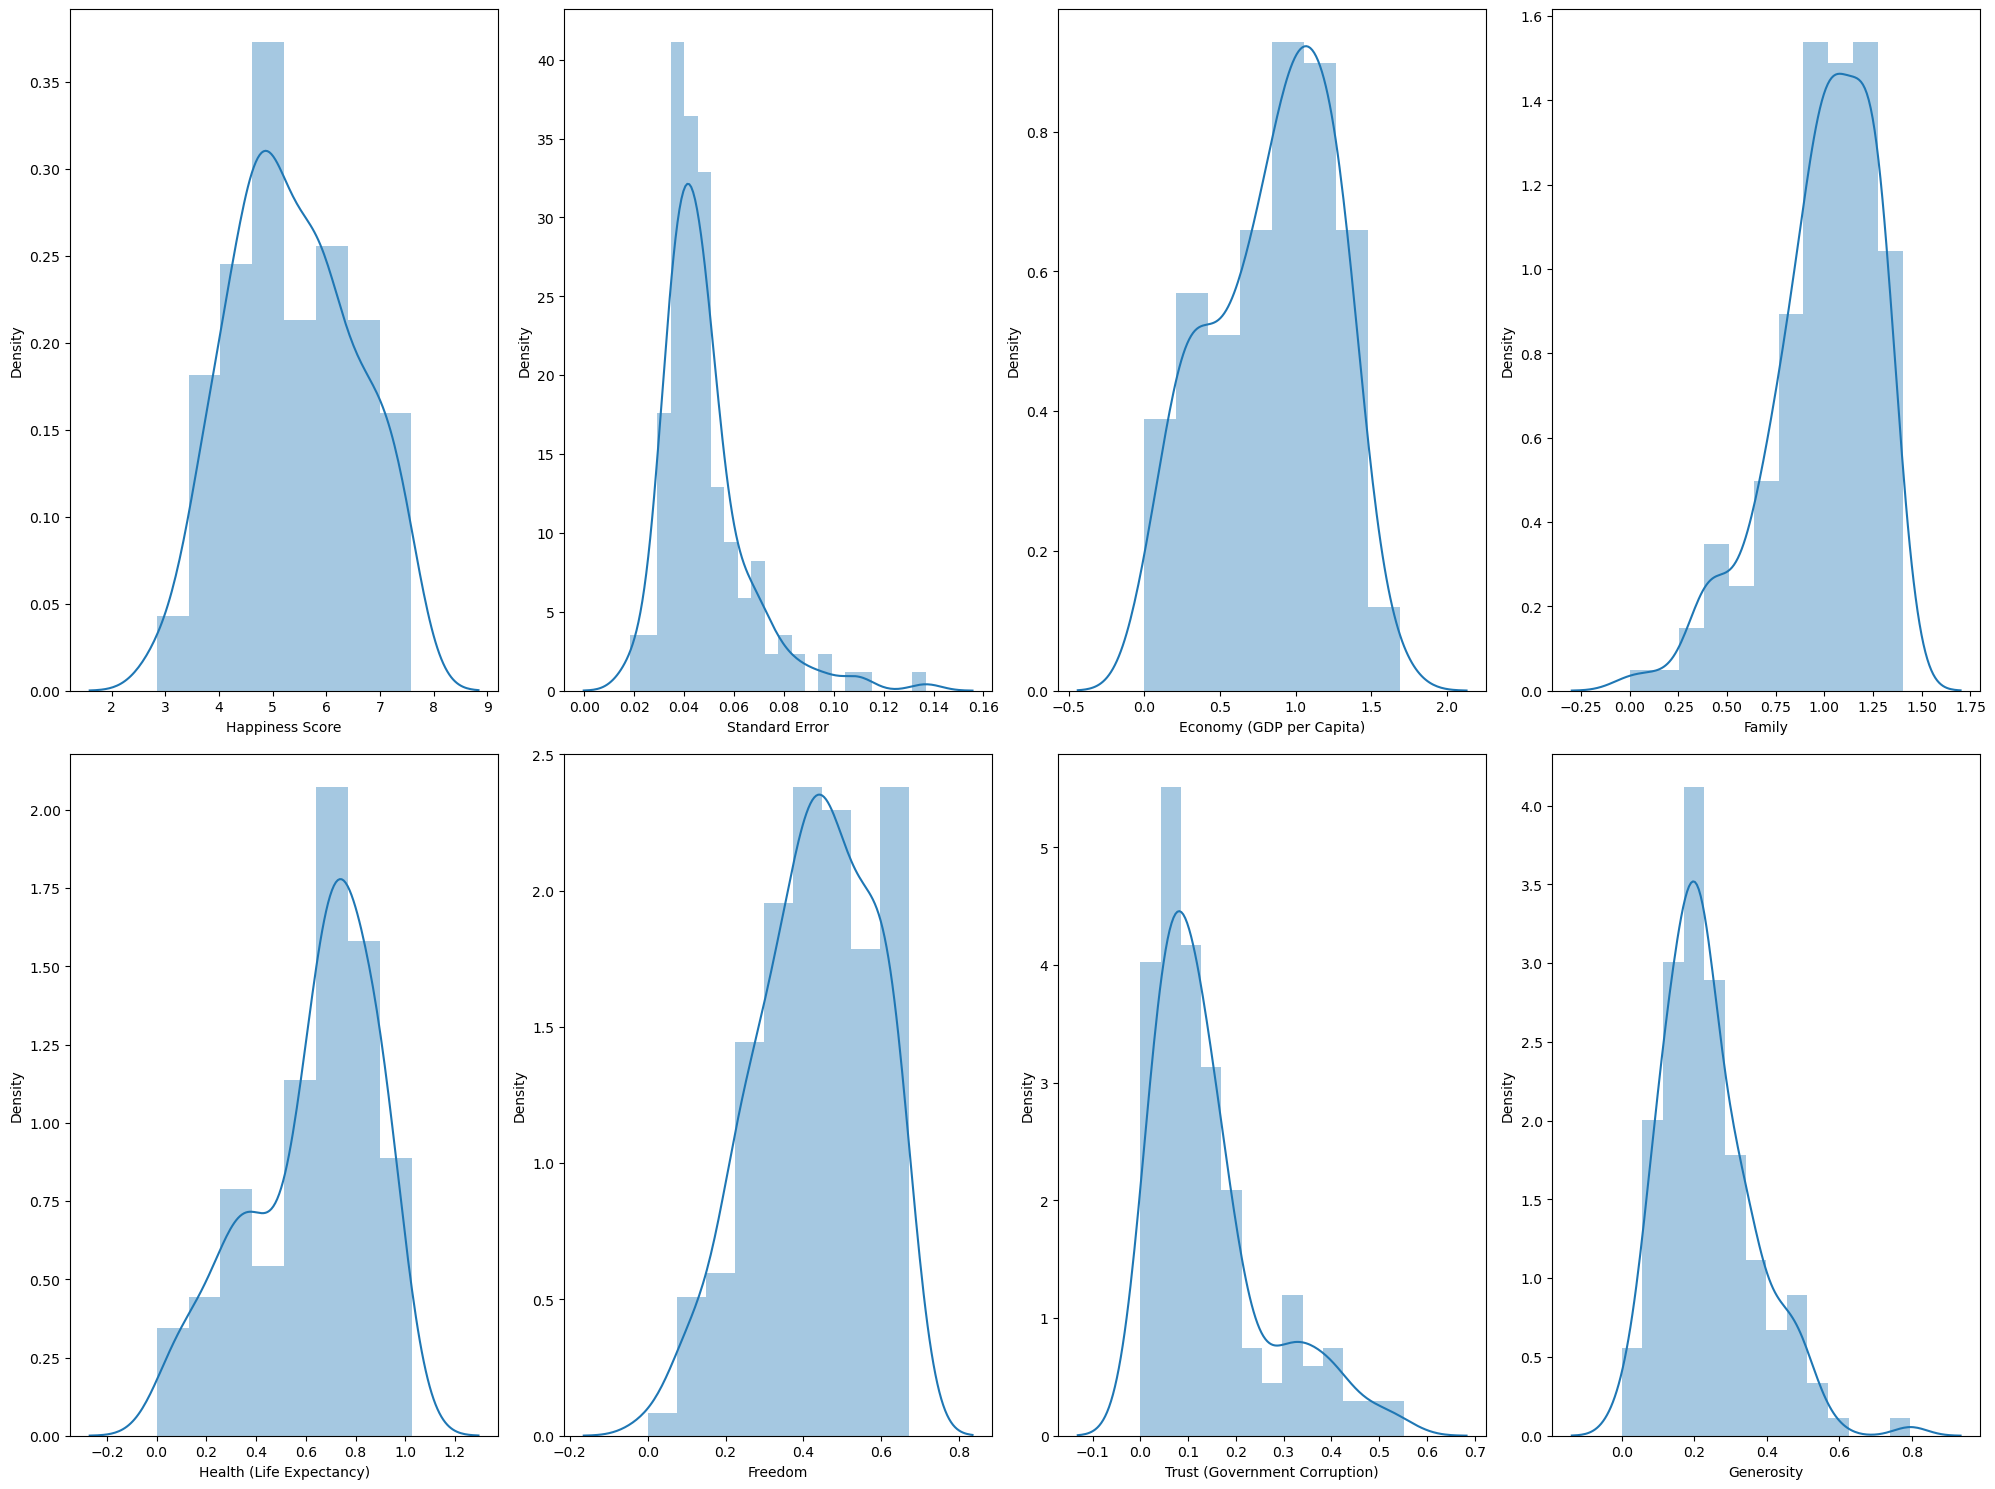

In [11]:
plt.figure(figsize=(20,15))
plotnumber =1

for column in df1:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df1[column])
        
    plotnumber+=1
    
plt.tight_layout()    
#family varibale and economy has left skewed data
# apart from that all are right skewed data only 

In [25]:
df1['Standard Error'] = df1['Standard Error'].replace(0,df1['Standard Error'].mean())
df1['Economy (GDP per Capita)'] = df1['Economy (GDP per Capita)'].replace(0,df1['Economy (GDP per Capita)'].mean())
df1['Family'] = df1['Family'].replace(0,df1['Family'].mean())
df1['Health (Life Expectancy)'] = df1['Health (Life Expectancy)'].replace(0,df1['Health (Life Expectancy)'].mean())
df1['Freedom'] = df1['Freedom'].replace(0,df1['Freedom'].mean())
df1['Trust (Government Corruption)'] = df1['Trust (Government Corruption)'].replace(0,df1['Trust (Government Corruption)'].mean())
df1['Generosity'] = df1['Generosity'].replace(0,df1['Generosity'].mean())
df1['Generosity'] = df1['Generosity'].replace(0,df1['Generosity'].mean())
#replace method to remove skewness from data 

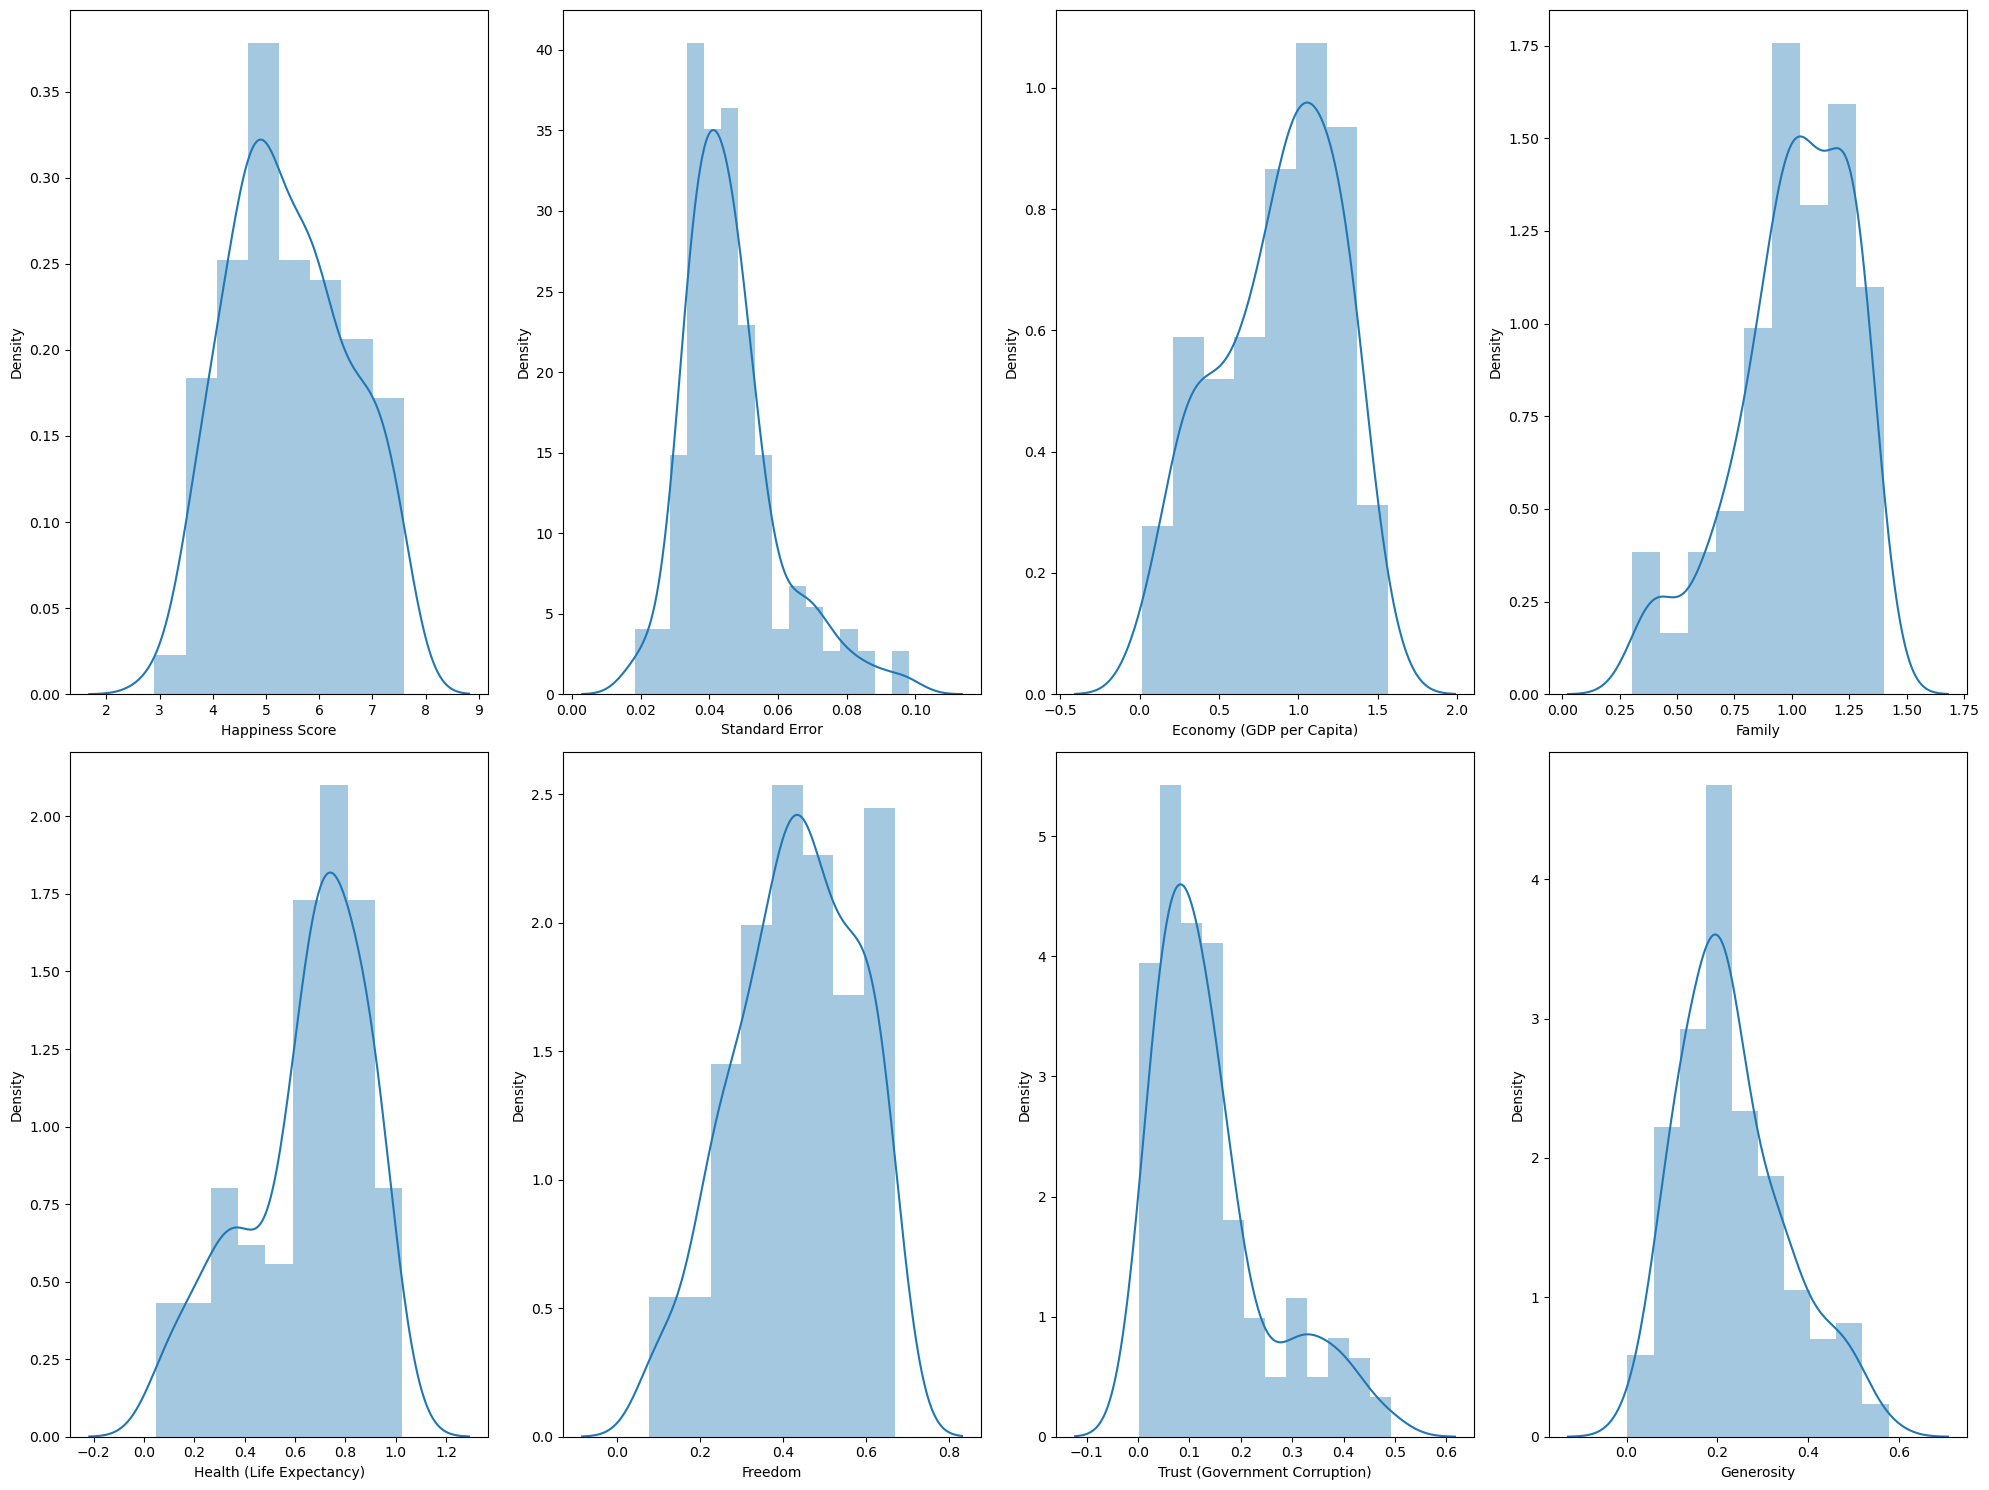

In [26]:
plt.figure(figsize=(20,15))
plotnumber =1

for column in df1:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df1[column])
        
    plotnumber+=1
    
plt.tight_layout()   
#you can check skewnwss is removed but not completely

In [27]:
df.skew()
#skewness

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

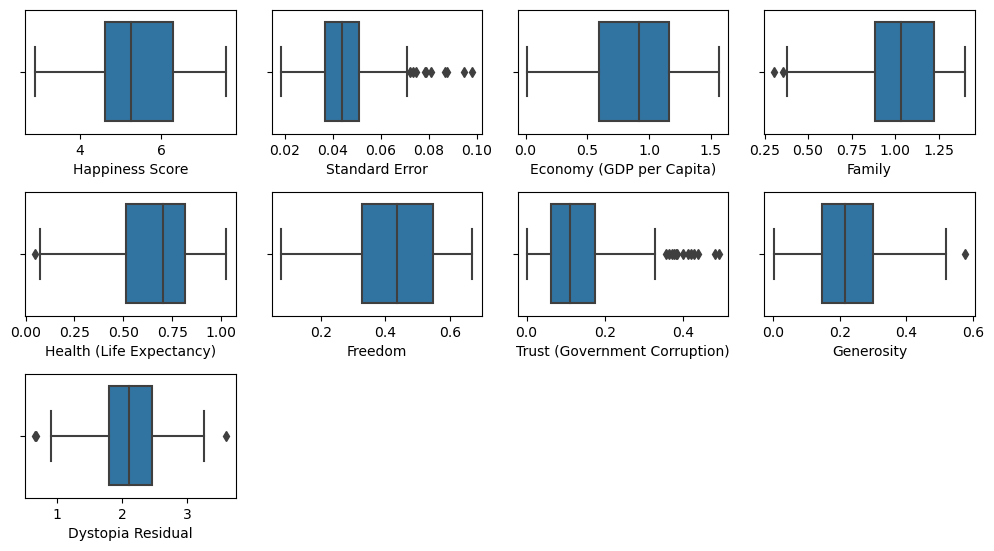

In [28]:
plt.figure(figsize=(10,7))
graph = 1

for column in df1:
    if graph<=12:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(df1[column] )
        
        
    graph+=1 
    
plt.tight_layout()   

#With the help of the above boxplot we are able to see the whisker details and outliers clearly. 

In [29]:
from scipy.stats import zscore
#importing zscore

# Z score method for removing outlier the acceptable range is  +/-0.5 value of skewness.

z=np.abs(zscore(df1))
threshold=3
np.where(z>3)

df1=df1[(z<3).all(axis=1)]
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


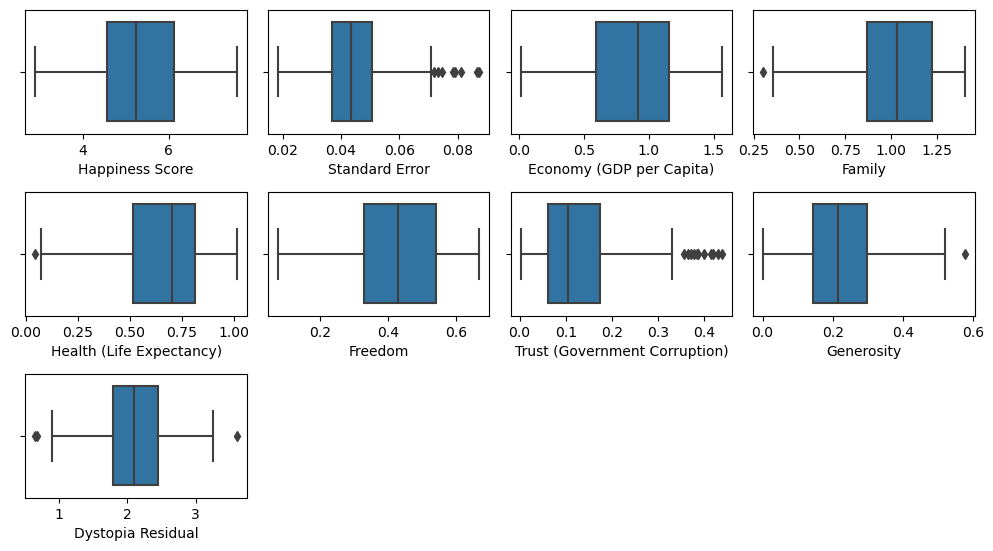

In [30]:
plt.figure(figsize=(10,7))
graph = 1

for column in df1:
    if graph<=12:
        ax = plt.subplot(4,4,graph)
        sns.boxplot(df1[column] )
        
        
    graph+=1 
    
plt.tight_layout()   

#the outliers is present but the box plot is better then previous one some outlier got treated.

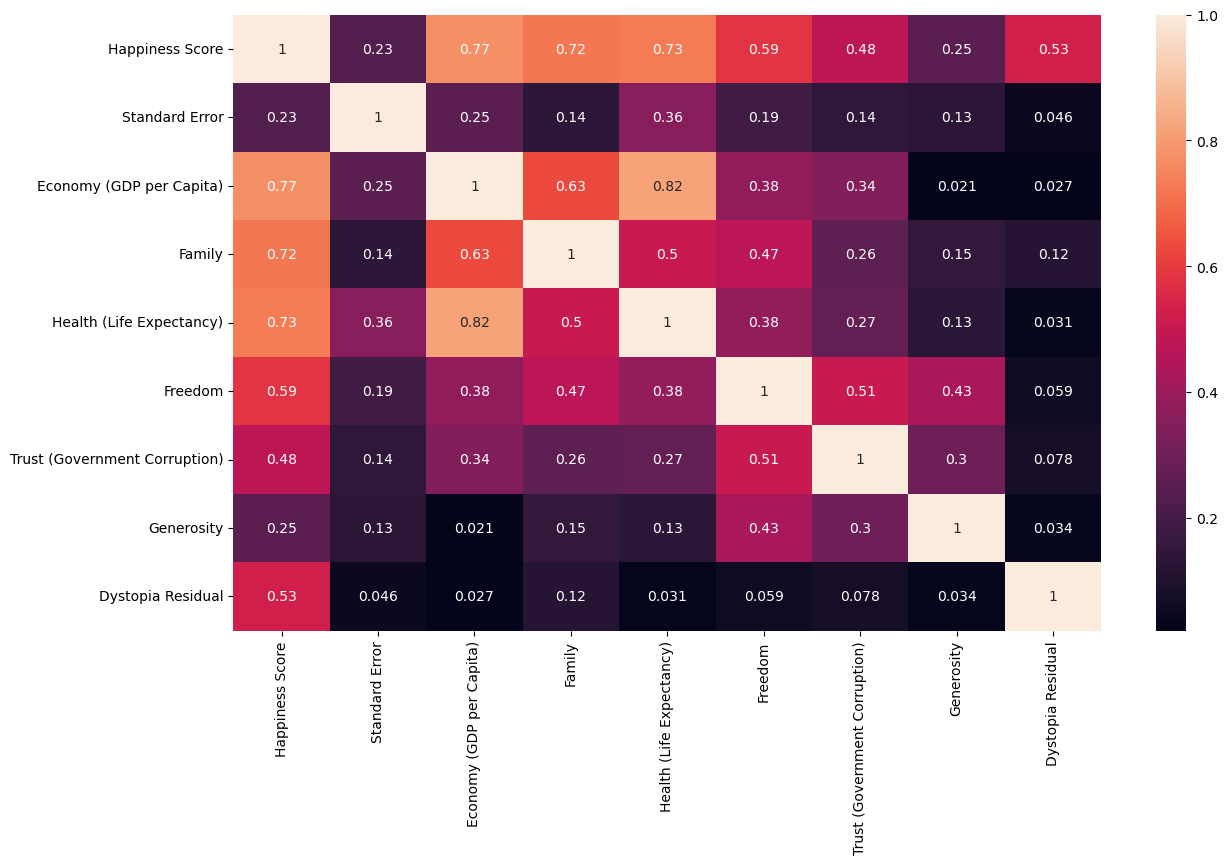

In [16]:
df_corr = df1.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
#there are almost postive correlation 
#hight corelate with  happiness score and Econony (GDP per capita)
#Econony (GDP per capita) this corelate with health(life expectancy )
# happiness score is related with family also 

In [17]:

vif =pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns
#vif method to check 

In [18]:
vif

,vif,Features
0,4.009209e+08,Happiness Score
1,8.893680e+00,Standard Error
2,1.165874e+07,Economy (GDP per Capita)
3,1.410546e+07,Family
4,6.108686e+06,Health (Life Expectancy)
5,2.678459e+06,Freedom
6,4.241308e+05,Trust (Government Corruption)
7,8.863873e+05,Generosity
8,6.231525e+07,Dystopia Residual


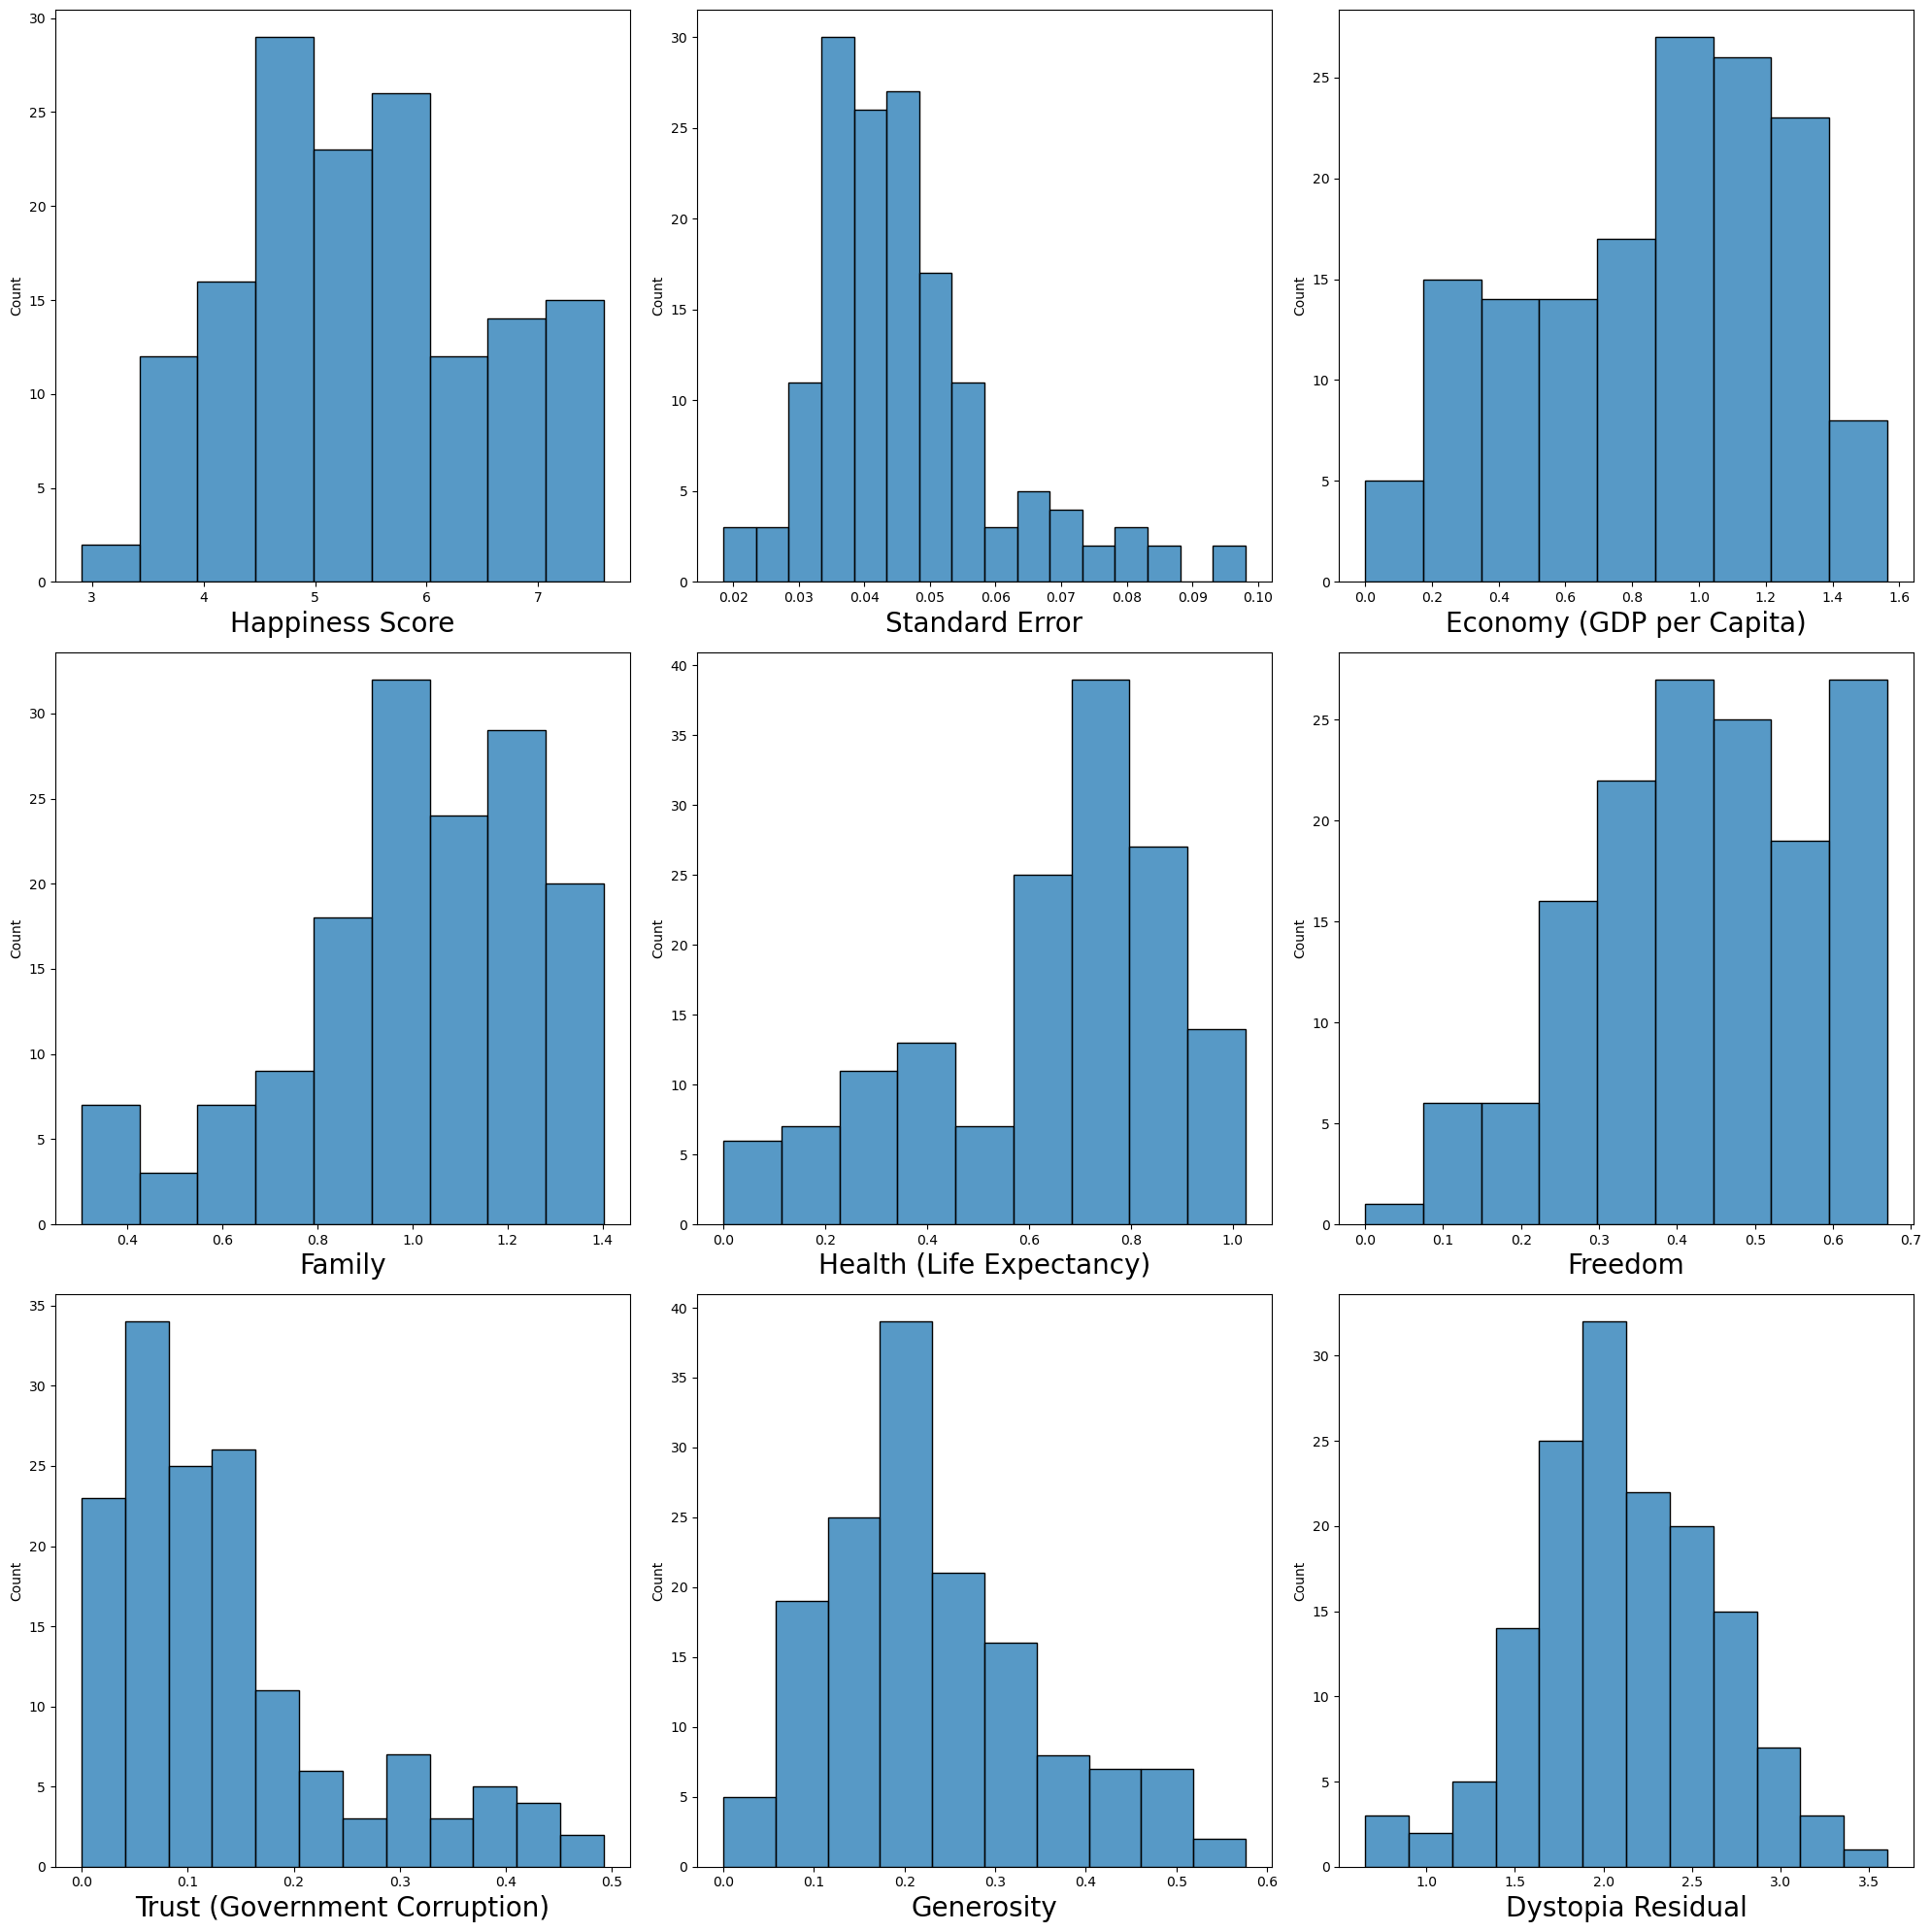

In [19]:
plt.figure(figsize=(20,20))
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df1[column], palette='Rainbow' )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [37]:
abc = df.groupby('Region')
abc['Happiness Score'].describe().sort_values(by='mean',ascending=True)

#we can see  Australia and New Zealand and highest happiness score  followed by north america
# Sub-Saharan Africa least happniess score in the world 

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [48]:
x= df1.drop(['Happiness Score'],axis=1)
y = df1['Happiness Score']
#seperating x and  y 

In [79]:
#all necesary libariers
#Importing Machine learning Model library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [80]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9784054916020314
mean_squared_error: 0.027761237649577594
Squareroot_mean_squared_error 0.16661703889331844
Root Mean Squared Log Error   -1.7920572802094328


In [83]:
# Ridge:
from sklearn.linear_model import Ridgecv
Ridge = Ridge()
Ridge = Ridge.fit(x_train, y_train)

# Prediction:
y_pred = Ridge.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9710964784113092
mean_squared_error: 0.037157480825487345
Squareroot_mean_squared_error 0.19276275787995809
Root Mean Squared Log Error   -1.6462950799874


In [84]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.8645774221569316
mean_squared_error: 0.17409511239318165
Squareroot_mean_squared_error 0.41724706397191297
Root Mean Squared Log Error   -0.874076753081096


In [85]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.7517762665672093
mean_squared_error: 0.3191088181818182
Squareroot_mean_squared_error 0.5648971748750548
Root Mean Squared Log Error   -0.5711115557697198


In [96]:
# Ridge:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
lassocv = LassoCV(alphas = None,max_iter=10,normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=10, normalize=True)

In [97]:
alpa = lassocv.alpha_
alpa
lasso = Lasso(alpa)

In [102]:
lasso
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
a_pred = lasso.predict(x_test)

In [103]:
a_pred

array([5.32462923, 3.6416934 , 6.50198766, 6.8662546 , 5.97018172,
       4.35379716, 4.06472877, 4.54513501, 5.06430367, 6.88456127,
       7.1773105 , 5.76306044, 3.99760342, 5.12365161, 5.1997647 ,
       6.12862688, 4.51889327, 3.87919095, 4.71573848, 4.68214949,
       5.08674771, 3.78896522, 7.19557517, 5.4233552 , 6.39688041,
       5.88488676, 5.83430974, 5.18670918, 5.37006369, 7.27943338,
       7.39950725, 6.57413449, 4.27183004, 4.18372494, 6.93904383,
       7.22806215, 4.34446448, 5.67964184, 5.54142187, 4.78620447,
       4.52126053, 4.78996993, 5.15309689, 7.58019655])

In [106]:
# Lasso:
from sklearn.linear_model import LassoCV,Lasso
lassocv = LassoCV(alphas = None,max_iter=10,normalize=True)
lassocv.fit(x_train,y_train)

alpa = lassocv.alpha_
alpa
lasso = Lasso(alpa)

lasso
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)
a_pred = lasso.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, a_pred))
print('mean_squared_error:',mean_squared_error(y_test, a_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, a_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, a_pred))))

r2_score: 0.9784010933757217
mean_squared_error: 0.027766891874418984
Squareroot_mean_squared_error 0.1666340057563851
Root Mean Squared Log Error   -1.7919554538934843


In [107]:
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})
final_values
#look the predicted value is higher that actual vallue and hapniess c=score is incresed

,Actual values,Predicted values
75,5.332,5.324629
150,3.655,3.641693
30,6.505,6.501988
20,6.867,6.866255
47,5.975,5.970182
125,4.369,4.353797
135,4.077,4.064729
116,4.565,4.545135
90,5.057,5.064304
19,6.901,6.884561


In [108]:
#We can see that Linear Regression Model Gives us maximum R2 Score